In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import Series

from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.model_selection import train_test_split

In [2]:
# dataset united kingdom
#case = pd.read_csv('UK/case.csv')
#mobility = pd.read_csv('UK/mobility.csv')
#case.set_index('date', inplace=True)
#mobility.set_index('date', inplace=True)

# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

In [3]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [4]:
data = pd.concat([case, new_weather], axis=1)
data.head()

,case,rh,avt,mxt,mnt
date,,,,,
2020-03-18,38,86.0,27.6,29.0,25.800000
2020-03-19,50,83.0,28.1,31.4,25.800000
2020-03-20,14,82.0,27.4,31.2,25.200000
2020-03-21,44,81.0,28.1,32.4,26.521978
2020-03-22,36,84.0,27.2,31.2,25.000000


In [5]:
model = VARMAX(data, exog=mobility, order=(3, 1))
model_fit = model.fit(disp=False)
print(model_fit.summary())

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                    Statespace Model Results                                   
Dep. Variable:     ['case', 'rh', 'avt', 'mxt', 'mnt']   No. Observations:                  423
Model:                                     VARMAX(3,1)   Log Likelihood               -5321.712
                                           + intercept   AIC                          10943.425
Date:                                 Sun, 22 Aug 2021   BIC                          11550.531
Time:                                         14:08:53   HQIC                         11183.312
Sample:                                     03-18-2020                                         
                                          - 05-14-2021                                         
Covariance Type:                                   opg                                         
Ljung-Box (L1) (Q):      2.11, 0.03, 0.04, 0.06, 0.00   Jarque-Bera (JB):   592.72, 3.69, 25.59, 16.64, 6.85
Prob(Q):                 0.

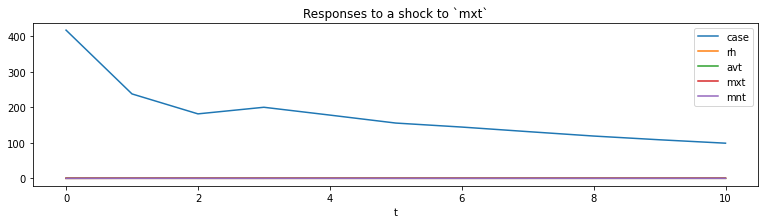

In [6]:
ax = model_fit.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `mxt`');

In [7]:
evalu = pd.read_csv('data/new/evaluation.csv')
mobility_exog = pd.read_csv('data/new/mobility_exog2.csv')

In [8]:
yhat = model_fit.forecast(steps=len(mobility_exog),exog=mobility_exog)
print(yhat)

                   case         rh        avt        mxt        mnt
2021-05-15   855.462266  73.619001  29.203289  33.286365  26.220613
2021-05-16   927.526721  74.509344  29.038716  32.907944  25.991523
2021-05-17   902.008743  74.132961  29.161673  32.957637  25.986247
2021-05-18   959.670365  74.620946  28.972130  32.848526  26.047540
2021-05-19   997.764104  75.084910  28.880113  32.689681  25.936628
2021-05-20   986.574689  75.210175  28.989970  32.640930  25.935775
2021-05-21   976.764900  75.296554  28.949812  32.604108  26.124340
2021-05-22  1005.366043  75.914453  28.797969  32.628567  25.952779
2021-05-23  1007.080338  76.279600  28.735849  32.542658  25.968746
2021-05-24  1020.458470  76.120920  28.678863  32.440164  25.921603
2021-05-25  1016.037727  75.706500  28.805237  32.582191  25.744625
2021-05-26  1066.421719  75.275834  28.825061  32.490532  25.831420
2021-05-27  1050.451654  75.422809  28.872384  32.542074  25.920346
2021-05-28   985.320841  75.386918  29.045782  3

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [9]:
hasil = model_fit.forecast(steps=len(mobility_exog),exog=mobility_exog)
list_hasil = hasil['case'].tolist()
list_eval = evalu['case'].tolist()
test_list = [int(i) for i in list_hasil]
test_list

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


[855,
 927,
 902,
 959,
 997,
 986,
 976,
 1005,
 1007,
 1020,
 1016,
 1066,
 1050,
 985,
 1026,
 1022,
 996]

In [10]:
rms = mean_squared_error(list_eval, test_list, squared=False)
rms

404.2068486191052

In [11]:
mse = mean_squared_error(list_eval, test_list)
mse

163383.17647058822

In [12]:
mae = mean_absolute_error(list_eval, test_list)
mae

331.7647058823529